Solving the diffusion equation in r (under the no-z approximation)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D
import sys

In [37]:
# Necessary functions

def initial_condition(r):
    #noise_amplitude = 0.01
    Br_0 = 1
    Bphi_0 = 1
    Br=Br_0* 0.5*r**2 + (np.sin(np.pi*r)**2)
    Bphi= Bphi_0* -0.5*r**2 + np.cos(3*np.pi*r)
    return Br, Bphi

def time_derivative(B, dBdr, ddBddr, r):
    return eta * (ddBddr + (dBdr/r) - B/(r**2) - (((np.pi ** 2) * B) / (4 * (h ** 2))))


def spatial_derivative(B, dx):
    B_copy = np.copy(B)
    
    # putting relative anti-symmetric ghost zone
    B_copy = np.append(-np.flip(B_copy[1:4]), B_copy)
    B_copy = np.append(B_copy, -np.flip(B_copy[-4:-1]))
    B_copy[0:3] = B_copy[0:3] + (2 * B[0])
    B_copy[-3:] = B_copy[-3:] + (2 * B[-1])
    
    # To append the Ghost zones
    B = np.append(B, np.zeros(3))
    B = np.append(np.zeros(3), B)
    
    
    der_1 = []
    der_2 = []
    
    # 2nd order finite difference
    for i in range(3,len(B_copy)-3):
        der_1.append(((B_copy[i+1] - B_copy[i-1]) / (2.0 * dx)))
        der_2.append((B_copy[i+1] - 2.0 * B_copy[i] + B_copy[i-1]) / (dx**2))
    
    der_1 = np.array(der_1)
    der_2 = np.array( der_2)
    
    return der_1, der_2




In [46]:
eta = 0.01 # Diffusion Constant
r_i = 0.1
r_f = 1.5
Nr = 100
t = 1
Nt = 100
h = 1  

dt= t/Nt  #step size along t-axis
dr = (r_f - r_i)/(Nr - 1) #step size along r-axis

C = (2 * eta * dt) / ((dr)**2)
Nt_ = (2 * eta * t) / ((dr)**2)

r = np.linspace(r_i, r_f, Nr)
tspan = np.linspace(0, t, Nt)
##############################################################################################

# defining intial B_r

Br = initial_condition(r)[0]
Bphi = initial_condition(r)[1]

Br_list = [Br] 

#contains initial condition
#print('Br:', Br)

# The Boundary Conditions are easily observed in the plots
# Br[0] = 0
# Br[-1] = 0
# Bphi[0] = 0
# Bphi[-1] = 0

Bphi_list = [Bphi]

dr = r[1] - r[0]


# Runge-Kutta method for solving the diffusion equation
for i in range(1, Nt+1):

    #for B_r
    dBrdr, ddBrddr = spatial_derivative(Br, dr)
    
    k1 = dt * time_derivative(Br, dBrdr, ddBrddr, r)
    k2 = dt * time_derivative(Br + (k1/2), dBrdr, ddBrddr, r)
    k3 = dt * time_derivative(Br + (k2/2), dBrdr, ddBrddr, r)
    k4 = dt * time_derivative(Br + k3, dBrdr, ddBrddr, r)
    Br = Br + (k1 + (2*k2) + (2*k3) + k4)/6
    
    Br_list.append(Br) #appends Br at next time step to list of Brs
    
    #for B_phi
    dBphidr, ddBphiddr = spatial_derivative(Bphi, dr)

    k1 = dt * time_derivative(Bphi, dBphidr, ddBphiddr, r)
    k2 = dt * time_derivative(Bphi + (k1/2), dBphidr, ddBphiddr, r)
    k3 = dt * time_derivative(Bphi + (k2/2), dBphidr, ddBphiddr, r)
    k4 = dt * time_derivative(Bphi + k3, dBphidr, ddBphiddr, r)

    Bphi = Bphi + (k1 + (2*k2) + (2*k3) + k4)/6

    Bphi_list.append(Bphi) #appends Bphi at next time step to list of Bphis


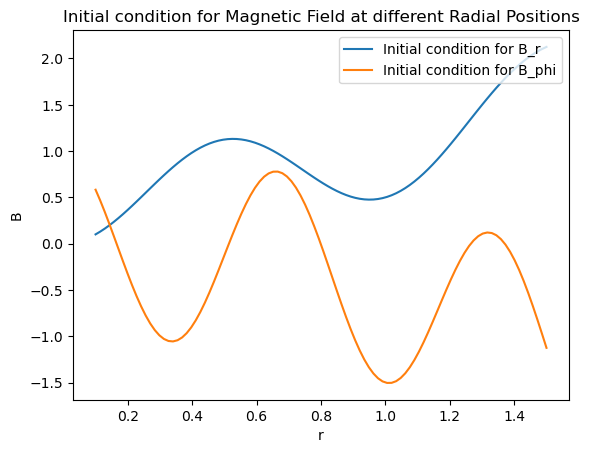

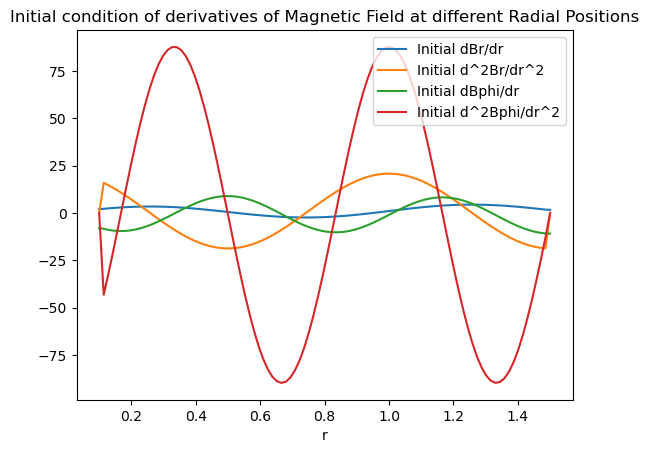

In [47]:
# # plotting initial condition
plt.plot(r, Br_list[0], label = 'Initial condition for B_r')
plt.plot(r, Bphi_list[0], label = 'Initial condition for B_phi')
plt.xlabel('r')
plt.ylabel('B')
plt.title('Initial condition for Magnetic Field at different Radial Positions')

plt.legend(loc='upper right')
plt.show()

dBrdr, ddBrddr = spatial_derivative(Br_list[0], dr)
dBphidr, ddBphiddr = spatial_derivative(Bphi_list[0], dr)

plt.plot(r, dBrdr, label = 'Initial dBr/dr')
plt.plot(r, ddBrddr, label = 'Initial d^2Br/dr^2')
plt.plot(r, dBphidr, label = 'Initial dBphi/dr')
plt.plot(r, ddBphiddr, label = 'Initial d^2Bphi/dr^2')
plt.title('Initial condition of derivatives of Magnetic Field at different Radial Positions')

plt.xlabel('r')
plt.legend(loc='upper right')
plt.show()




Exploring the evolution of the magnetic field magnitude

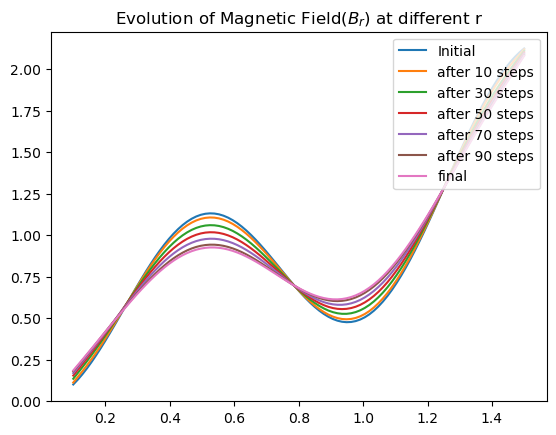

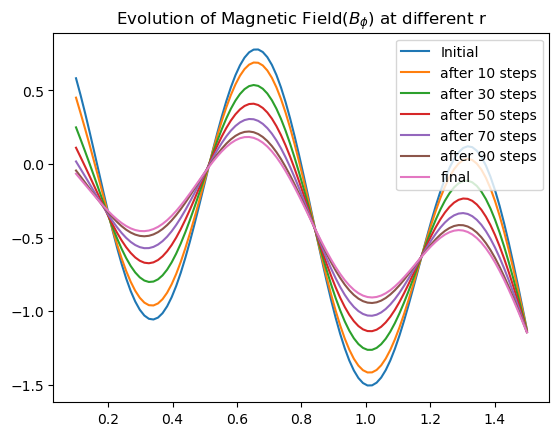

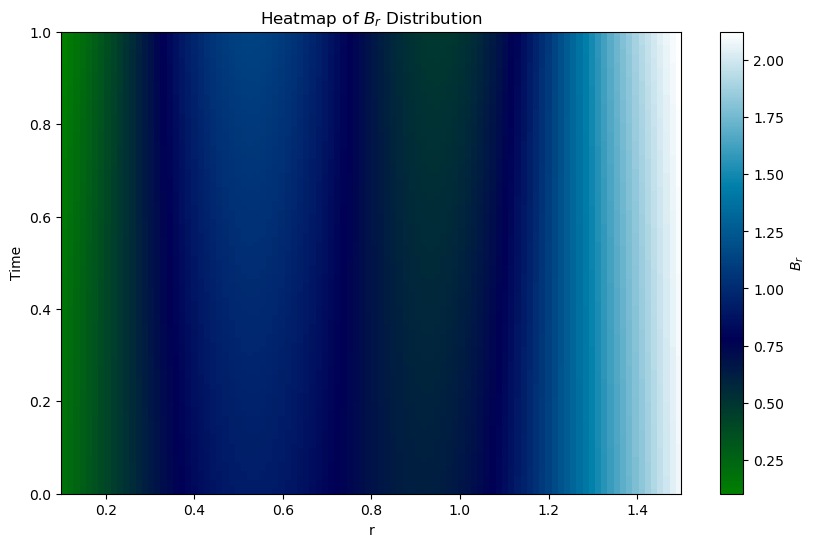

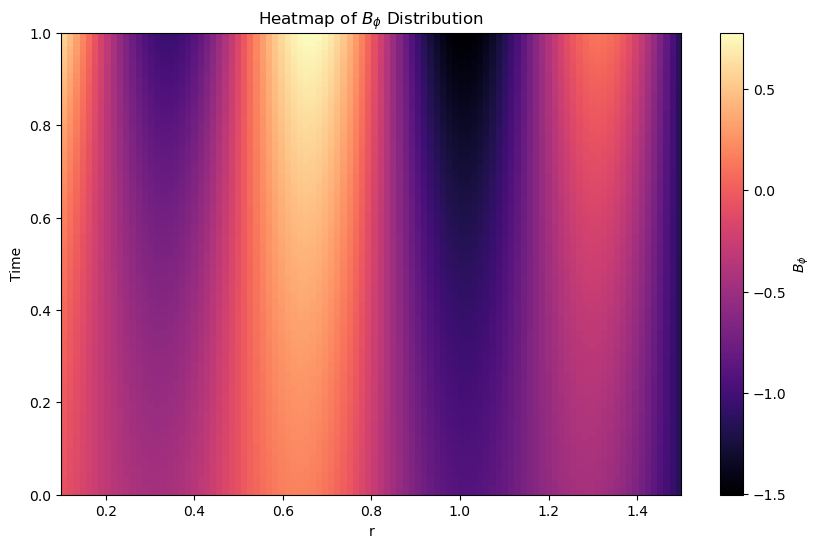

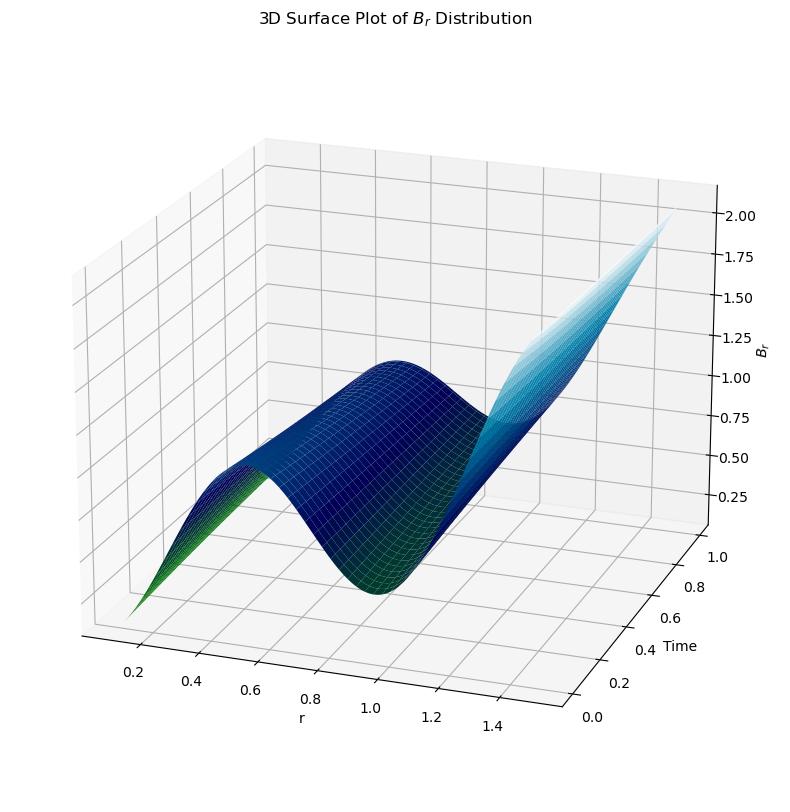

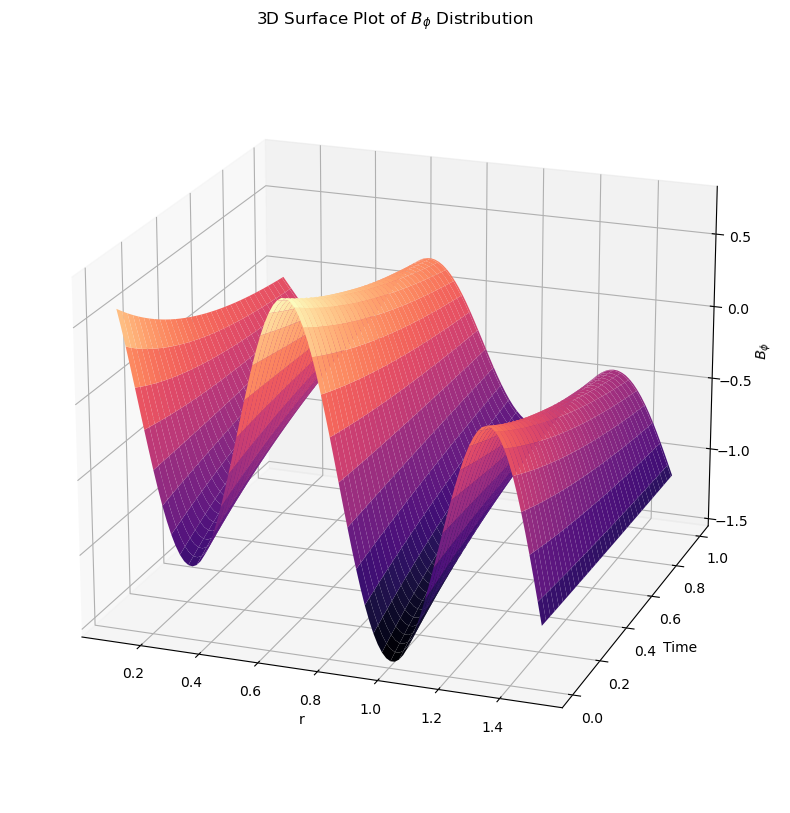

In [40]:
# plotting EVOLUTION


fig, ax = plt.subplots()
ax.plot(r, Br_list[0], label='Initial')
ax.plot(r, Br_list[10], label='after 10 steps')
ax.plot(r, Br_list[30], label='after 30 steps')
ax.plot(r, Br_list[50], label='after 50 steps')
ax.plot(r, Br_list[70], label='after 70 steps')
ax.plot(r, Br_list[90], label='after 90 steps')
ax.plot(r, Br_list[-1], label='final')
ax.legend(loc='upper right')
plt.title('Evolution of Magnetic Field($B_r$) at different r')

plt.show()

fig, ax = plt.subplots()
ax.plot(r, Bphi_list[0], label='Initial')
ax.plot(r, Bphi_list[10], label='after 10 steps')
ax.plot(r, Bphi_list[30], label='after 30 steps')
ax.plot(r, Bphi_list[50], label='after 50 steps')
ax.plot(r, Bphi_list[70], label='after 70 steps')
ax.plot(r, Bphi_list[90], label='after 90 steps')
ax.plot(r, Bphi_list[-1], label='final')
ax.legend(loc='upper right')
plt.title('Evolution of Magnetic Field($B_{\phi}$) at different r')

plt.show()


# Modify this section to convert lists to NumPy arrays
Br_array = np.array(Br_list)
Bphi_array = np.array(Bphi_list)

# Modify this section to plot heat map
plt.figure(figsize=(10, 6))
plt.imshow(Br_array, extent=[r_i, r_f, 0, t], aspect='auto', cmap='ocean')
plt.colorbar(label='$B_r$')
plt.title('Heatmap of $B_r$ Distribution')
plt.xlabel('r')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(Bphi_array, extent=[r_i, r_f, 0, t], aspect='auto', cmap='magma')
plt.colorbar(label='$B_{\phi}$')
plt.title('Heatmap of $B_{\phi}$ Distribution')
plt.xlabel('r')
plt.ylabel('Time')
plt.show()

# Modify this section to plot 3D surface plot
R, T = np.meshgrid(r, np.linspace(0, t, Nt + 1))

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(R, T, Br_array, cmap='ocean')
ax.set_title('3D Surface Plot of $B_r$ Distribution')
ax.set_xlabel('r')
ax.set_ylabel('Time')
ax.set_zlabel('$B_r$')
#plt.subplots_adjust(left=0.1, right=1.2, bottom=0.1, top=0.9)
ax.view_init(elev=20,azim=-70)
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(R, T, Bphi_array, cmap='magma')
ax.set_title('3D Surface Plot of $B_{\phi}$ Distribution')
ax.set_xlabel('r')
ax.set_ylabel('Time')
ax.set_zlabel('$B_{\phi}$')
ax.view_init(elev=20,azim=-70)
plt.show()



100%|██████████| 100/100 [00:00<00:00, 828.66it/s]


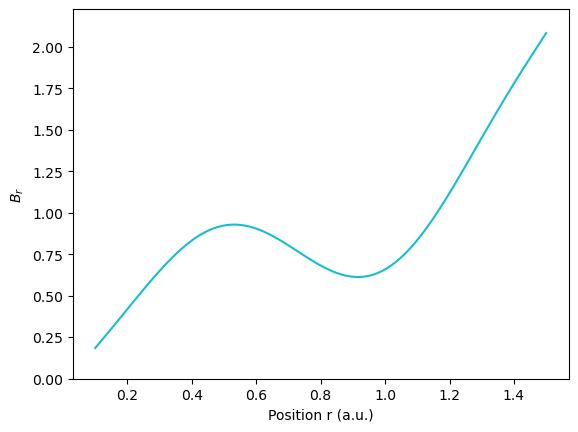

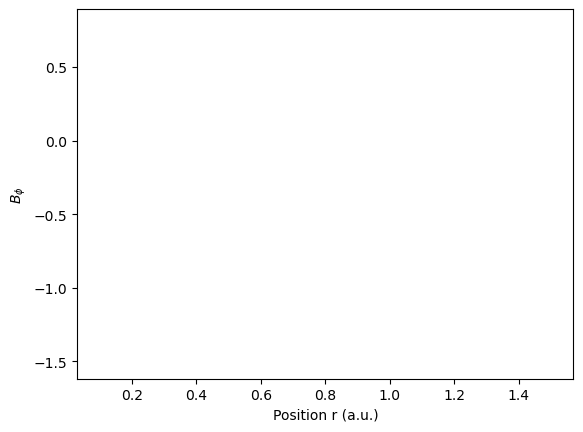

In [56]:
from celluloid import Camera
from tqdm import tqdm

fig = plt.figure()
camera = Camera(fig)
for i in tqdm(range(len(tspan))):
    plt.plot(r,Br_list[i])
    plt.xlabel('Position r (a.u.)')
    plt.ylabel('$B_r$')
    camera.snap()

animation = camera.animate()
animation.save('Br.gif',writer='pillow',fps=30)

fig = plt.figure()
camera = Camera(fig)
for i in tqdm(range(len(tspan))):
    plt.plot(r,Bphi_list[i])
    plt.xlabel('Position r (a.u.)')
    plt.ylabel('$B_{\phi}$')
    camera.snap()

animation = camera.animate()
animation.save('Bphi.gif',writer='pillow',fps=30)


In [41]:
# print(Br_list[0].shape)

# plt.plot(Br_list[0])

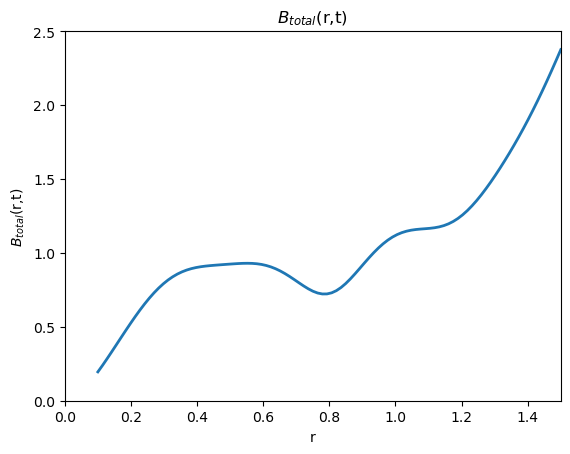

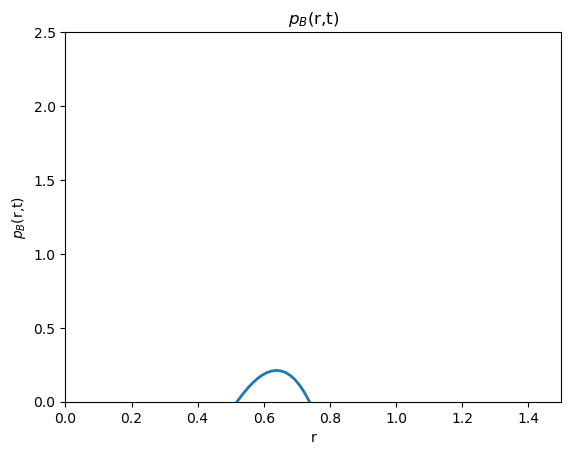

In [45]:
# Initialize arrays to store the total magnetic field and pitch angle

B_total = []
pitch_angle = []

# Calculate total magnetic field and pitch angle at each time step
for i in range(Nt + 1):
    #print(Br_list,Bphi_array[i])
    B_total.append(np.sqrt(Br_array[i]**2 + Bphi_array[i]**2))
    pitch_angle.append(np.arctan2(Bphi_array[i], Br_array[i]))

def plot_animate(U, tspan, xspan, T, L, name):
    fig, ax = plt.subplots()
    ax.set_xlim(0, L)
    ax.set_ylim(0, 2.5)
    ax.set_xlabel('r')
    ax.set_ylabel(f'{str(name)}(r,t)')
    ax.set_title(f'{str(name)}(r,t)')

    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        line.set_data(xspan, U[i])
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=len(tspan), init_func=init, blit=True)
    ani.save(name+'.gif', writer='pillow', fps=30)  
    
    # Use FFMpegWriter and save as MP4

tspan = np.linspace(0,1,100)
plot_animate(B_total,tspan, r, 1, 1.5, '$B_{total}$')

plot_animate(pitch_angle,tspan, r, 1, 1.5, '$p_B$')
